# Lecture 4: Manipulating & Plotting 2D fMRI arrays: Slices

## Goals

- **Neuroscience / Neuroimaging concepts**
    - Review of simple neuroimaging and fMRI jargon terms
- **Datascience / Coding concepts**
    - Subsetting 2D arrays: Slicing and Indexing
    - Cautions with array slicing
    - Operations across single dimensions of n-D arrays
    - `np.stack()`    
    - Visualizing fMRI Slice data: 2D images
    - Visualizing Collections of Voxel Time Series: Multiple line plots
    - Functions for reusable code
    - Creating code files for export

# Key Terms and Concepts

Below is a list of the key terms and concepts you should know after this lecture. The list below are links to the sections of the notebook where you can learn more about each term/concept.

<br/>
<div style="font-size:15pt;">
    
1. [Indexing in 2D](#Indexing_2D) <br/>
2. [Slicing in 2D](#Slicing_2D) <br/>
3. [Downsampling](#Downsampling) <br/>
4. [`np.stack`](#Stack) <br/>
5. [`axis` in 2-D descriptive statistics](#Descriptive_2D) <br/>
6. [Line Plots for Collections of Voxel Time Series](#LinePlots_2D) <br/>
7. [Histograms for Collections of Voxel Time Series](#Histograms_2D) <br/>
8. [Visualizing fMRI Data Slice as Image](#Slice_Image) <br/>
9. [Aspect Ratio](#Aspect_Ratio) <br/>
10. [Colormaps](#Colormap) <br/>
11. [Slicing 2-D fMRI Data](#Slicing_fMRI_Data) <br/>
12. [Design Matrices](#Design_Matrix) <br/>
</div>

# Standard imports

This cell will import the Python modules needed for today's lecture. Simply run this cell.

In [1]:
import numpy as np
import nibabel
%matplotlib inline
import matplotlib.pyplot as plt

## Data preparation

This cell will load data necessary for today's lecture. Simply run this cell.

In [2]:
img = nibabel.load("/data/cogneuro/fMRI/categories/s01_categories_01.nii.gz")
data = img.get_data().T
mean_bold = data.mean(0)
slice_axial = mean_bold[15, :, :]
slice_coronal = mean_bold[::-1, 50, :]
slice_sagittal = mean_bold[::-1, :, 50]
slice_surprise = mean_bold[::-1, 25, :]

timeseries_multi = data[:, [6, 10, 6, 10], [57, 62, 58, 62], [37, 40, 37, 39]]
timeseries_single = timeseries_multi[:,0]

# Review

## Correction on Dissimilar Data

We have a correction to make concerning last week's lecture. When discussing the different meta-types of data that arrays can contain we **incorrectly** said that **dissimilar** is best plotted in bar plots, and gave an example of voxel weights as a form of dissimilar data. It can be tricky to differentiate between **similar unordered** data and **dissimilar** data, and we confused ourselves! So, to correct ourselves:

1. Bar plots are best used for **similar** data, usually **unordered**, when you have a small number of data points to plot. Because all the bars share the same scale on the y-axis, they should all represent values of similar measurements.
2. The **voxel weights** that we will calculate in the second half of the class are **similar unordered** data since they are measuring the same thing, namely the voxel response.
3. When you have **dissimilar** data, using a **table** is the most appropriate container type.

## Indexing & Slicing

We learned two ways to subset a 1-D array last week. Here's a quick overview with examples:

1. **Indexing**
    - Used to select arbitrary values (i.e. no pattern is necessary).
    - Can select the same data point multiple times.
    - Makes a copy of the data.
2. **Slicing**
    - Used to select data that has a pattern, meaning it has a regular step size.
    - Can only select each data point zero or one times.
    - Does not make a copy of the data, rather makes a **view** of the data that is just a reference.
    
Let's start with an example of indexing on a voxel time series.

In [3]:
timeseries_single.shape

(120,)

In [4]:
timeseries_indexed = timeseries_single[[5, 2, 0, 20, 74, 0, 0]]
timeseries_indexed

array([ 442.63720703,  432.95422363,  417.49649048,  426.98706055,
        439.14819336,  417.49649048,  417.49649048], dtype=float32)

In [5]:
timeseries_first20 = timeseries_single[:20]
timeseries_first20

array([ 417.49649048,  432.72558594,  432.95422363,  452.18237305,
        447.41003418,  442.63720703,  441.86392212,  444.09011841,
        446.31585693,  449.54110718,  440.76586914,  440.99017334,
        423.21398926,  415.43728638,  428.66012573,  406.88250732,
        424.10437012,  417.32577515,  418.54669189,  419.76712036], dtype=float32)

In [6]:
timeseries_even_indices = timeseries_single[::2]
timeseries_even_indices

array([ 417.49649048,  432.95422363,  447.41003418,  441.86392212,
        446.31585693,  440.76586914,  423.21398926,  428.66012573,
        424.10437012,  418.54669189,  426.98706055,  434.42550659,
        430.86203003,  436.29663086,  437.72927856,  432.16003418,
        425.58883667,  422.01571655,  422.44064331,  424.86367798,
        406.28475952,  431.70391846,  434.12115479,  416.53646851,
        436.9498291 ,  436.36126709,  429.77078247,  419.17837524,
        408.58404541,  416.98776245,  420.3895874 ,  430.78945923,
        437.18737793,  436.58340454,  436.97747803,  433.36965942,
        441.7598877 ,  439.14819336,  451.5345459 ,  458.91900635,
        445.30151367,  445.68209839,  421.0607605 ,  425.43746948,
        432.81228638,  442.18515015,  421.55609131,  431.92507935,
        434.29217529,  440.65731812,  426.02056885,  424.38183594,
        425.74121094,  426.09866333,  412.4541626 ,  424.80773926,
        425.15939331,  430.50912476,  419.85690308,  427.20278

In [7]:
timeseries_last5 = timeseries_single[-5:]
timeseries_last5

array([ 439.68325806,  419.85690308,  427.03009033,  427.20278931,  436.375     ], dtype=float32)

## Caution with arrays in numpy

Because slicing returns a **view** to arrays, and doesn't make a copy, it is easy to accidentaly change (or overwrite) your original array when using slicing. In addition to slicing, there are other situations when Python will give you a **view** on your original array. Knowing when you have a copy or a **view** of an array can prevent some major headaches! Let's look at `np.reshape`, which gives you a **view**.

### `np.reshape`
Last week we learned about the `np.reshape` function. Our goal had been to reshape a 3-D image into a very long 1-D array, by aligning all the entries one after another in order. We had also briefly seen that `np.reshape` can be used to give any new shape to an array, as long as the total number of elements doesn't change.

Let's create a toy 2-D array using `np.reshape` on a 1-D range array to illustrate just how `np.reshape` returns **views**.

In [8]:
arr1D = np.arange(30)
arr2D = arr1D.reshape(5, 6)
print(arr1D)
print(arr2D)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]


These two arrays look very different at first glance, however we know they contain the same data because the 2D array is just the 1D array reshaped. Let's prove it by looking at their shapes.

In [9]:
print(arr1D.shape)
print(arr2D.shape)

(30,)
(5, 6)


5 x 6 = 30, so it checks out. Now let's prove to ourselves that `np.reshape` gives us a **view** on the `arr1D` by modifying the first value in `arr2D` and seeing if `arr1D` changes.

In [10]:
arr2D[0,0] = 100
print(arr1D)
print(arr2D)

[100   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29]
[[100   1   2   3   4   5]
 [  6   7   8   9  10  11]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]
 [ 24  25  26  27  28  29]]


So what happens if we modify a value in the original `arr1D`, will that change `arr2D`?

In [11]:
arr1D[6] = 1000
print(arr1D)
print(arr2D)

[ 100    1    2    3    4    5 1000    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29]
[[ 100    1    2    3    4    5]
 [1000    7    8    9   10   11]
 [  12   13   14   15   16   17]
 [  18   19   20   21   22   23]
 [  24   25   26   27   28   29]]


It sure does!

# 2D Array Manipulation

Let's build on last week's introduction to **indexing** and **slicing** by extending the technique into 2-D arrays.

<a id='Indexing_2D'></a>
## Indexing in 2D Arrays

Last lecture we learned about using **indexing** to retrieve values with arbitrary indices from a 1-D array. Today we'll learn how to do this in 2-D, and then learn when it is useful with fMRI data. There are 3 uses of **indexing** in 2-D that we'll discuss today, although there are other ways to use it.

1. **Selecting single values**
2. **Selecting multiple values with arbitrary indices**
3. **Selecting entire rows or columns**

First let's look at indexing single values from 2D arrays:

In [12]:
arr2D

array([[ 100,    1,    2,    3,    4,    5],
       [1000,    7,    8,    9,   10,   11],
       [  12,   13,   14,   15,   16,   17],
       [  18,   19,   20,   21,   22,   23],
       [  24,   25,   26,   27,   28,   29]])

To extract the value from the second row (index 1) and third column (index 2), we write `array[1, 2]` 

In [13]:
indexed_point = arr2D[1, 2]
indexed_point

8

We can also extract multiple values at a time. Say we wanted to get the elements with the indices `(1, 0), (2, 1), (2, 2)`. We need to group the row indices in one list, and the column indices in another, like this `[1, 2, 2]` and `[0, 1, 2]`. Then we can use those for indexing.   

In [14]:
row_indices = [1, 2, 2]
col_indices = [0, 1, 2]
indexed_points_multiple = arr2D[row_indices, col_indices]
indexed_points_multiple

array([1000,   13,   14])

For our purposes, indexing will be really useful for extracting entire rows or entire columns from arrays. These entire rows or columns could represent time series from voxels we have selected for analysis.

First we'll define a list that contains the indices of the rows we want. Along with that list, we'll use the colon (`:`) operator to indicate we want all the columns. We learned last week that when there is no number before a colon, `None` is implied, which means start the first index. Likewise, no number after the colon means to end at the last index. Let's see how this all works here:

In [15]:
rows_of_interest = [3, 2]
indexed_rows = arr2D[rows_of_interest, :]
indexed_rows

array([[18, 19, 20, 21, 22, 23],
       [12, 13, 14, 15, 16, 17]])

In [41]:
indexed_rows = arr2D[1:3, rows_of_interest]
indexed_rows

array([[ 9,  8],
       [15, 14]])

In [42]:
indexed_rows[0,0] = 123456
indexed_rows

array([[123456,      8],
       [    15,     14]])

In [43]:
arr2D

array([[ 100,    1,    2,    3,    4,    5],
       [1000,    7,    8,    9,   10,   11],
       [  12,   13,   14,   15,   16,   17],
       [  18,   19,   20,   21,   22,   23],
       [  24,   25,   26,   27,   28,   29]])

In [16]:
cols_of_interest = [-1, 3]
indexed_cols = arr2D[:, cols_of_interest]
indexed_cols

array([[ 5,  3],
       [11,  9],
       [17, 15],
       [23, 21],
       [29, 27]])

### Indexing fMRI data

Now let's turn to some examples of fMRI data where we can put indexing to use. We learned last week that a 2-D array of fMRI data can contain one of two things:
1. **A collection of voxel timeseries**
2. **A sagittal, coronal or axial slice**

At the top of the lecture we've loaded 2-D arrays of both types. First, we'll use indexing on an array called `timeseries_multi` to subselect voxel time series of interest from a larger collection. Let's look at its shape.

In [17]:
timeseries_multi.shape

(120, 4)

How do we interpret this?
`timeseries_multi` has 120 rows, which represent time (TRs) and four columns which represent the voxels.

We would like to select the first and third voxel time series (indices `0` and `2`). Let's see how to do this in code.

In [18]:
voxel_indices = [0, 2]
timeseries_selected = timeseries_multi[:, voxel_indices]
timeseries_selected.shape

(120, 2)

Now we see that we have 2 columns, which represent the 2 voxels timseries that are 120 TRs in length.

#### Axes containing different meta-types of data representations

Last week we learned that arrays can contain 3 meta-types of data, although as we discussed earlier when working with fMRI data we are only interested in the 2 meta-types of similar data, namely:

1. **Similar ordered measurements**
2. **Similar unordered measurements**

When dealing with 1-D arrays, the entire array is one of these meta-types of data representations. However when we're dealing with arrays that have more than one axis, as we are today, it's important to note that each axis can potentially be described by a different meta-type. 

The `timeseries_multi` 2-D array is an example that has axes with two different meta-types of data. 
* The first axis of this array, which represent TRs, contains **similar ordered measurements**. Since each value is measuring the same the BOLD signal at the same point in space, it is a similar measurement. And since time increases as the indices increase, it is an ordered measurement.
* The second axis of this array, which represents different voxels, contains **similar unordered measurements** since it represents voxels that are not in any spatial order.

Different types of analyses and statistical techniques can be used depending on whether your data is ordered or unordered, so it is always good to keep that in mind. 

Now let's turn out attention to the second type of 2-D fMRI data, the slice (sagittal, coronal or axial). Both of this array's axes are **similar ordered** data.

Indexing can be useful in 2-D slice arrays  when we want to get a single voxel value. For this, we will use the first way of indexing mentioned today, using an integer in each of the axes. First let's look at the shape of the axial slice, which will tell us the range of indices we can use to select a single voxel value:

In [19]:
slice_axial.shape

(100, 100)

From this we see the indices we choose need to be between `0-99` on both axes, so let's choose `13, 42`:

In [20]:
single_voxel_value = slice_axial[13, 42]
single_voxel_value

909.96649

#### Breakout Session

1\. Use indexing to retrieve the last voxel time series from the collection `timeseries_multi`, and store it in a name called `timeseries_last`.

In [25]:
### STUDENT ANSWER
timeseries_last = timeseries_multi[:,-1]
timeseries_last.shape

(120,)

2\. Index into the 1-D array you just created to get the value of the voxel at index `42`.

In [26]:
### STUDENT ANSWER
timeseries_last[42]

692.76837

3\. Index into the coronal slice called `slice_coronal` and retrieve the value at the point `(23, 45)`

In [27]:
### STUDENT ANSWER
slice_coronal[23,45]

401.54166

<a id='Slicing_2D'></a>
## Slicing in 2D Arrays

Just as with indexing, we can use slicing for 2-D arrays. Remember that slicing involves a `[start:stop:step]`. Slicing in 2-D is useful for a couple of different things:

1. **Cropping in 1 or 2 axes** 
2. **Downsampling in 1 or 2 axes**

Let's look at how to do each of these on the toy example `array2D`:

In [28]:
arr2D

array([[ 100,    1,    2,    3,    4,    5],
       [1000,    7,    8,    9,   10,   11],
       [  12,   13,   14,   15,   16,   17],
       [  18,   19,   20,   21,   22,   23],
       [  24,   25,   26,   27,   28,   29]])

We can crop a 2-D array in a single axis by specifying the `start:stop` that define the area of that axes we want to keep. We leave off `step` because we want to use the default value of `1`. Let's crop the rows of this array so we keep only the first 3 rows.

In [29]:
arr2D[:3, :]

array([[ 100,    1,    2,    3,    4,    5],
       [1000,    7,    8,    9,   10,   11],
       [  12,   13,   14,   15,   16,   17]])

We can also crop the 2-D array to keep the last 2 columns:

In [30]:
arr2D[:, -2:]

array([[ 4,  5],
       [10, 11],
       [16, 17],
       [22, 23],
       [28, 29]])

Now let's do both, keeping only the first 3 rows and the last 2 columns.

In [31]:
arr2D[:3, -2:]

array([[ 4,  5],
       [10, 11],
       [16, 17]])

<a id="Downsampling"></a>
**Downsampling** means reducing the number of samples in a data set to reduce the resolution. This is only used on **ordered** data. To downsample using slicing, we specify a `step`. Let's downsample the rows using a `step` of 2:

In [32]:
arr2D[::2, :]

array([[100,   1,   2,   3,   4,   5],
       [ 12,  13,  14,  15,  16,  17],
       [ 24,  25,  26,  27,  28,  29]])

This gives us every other row of the original array. Now let's downsample the columns, getting every 3rd column:

In [33]:
arr2D[:, ::3]

array([[ 100,    3],
       [1000,    9],
       [  12,   15],
       [  18,   21],
       [  24,   27]])

Putting both together, we'll subsample the entire array using a `step` of `2` for both axes:

In [34]:
arr2D[::2, ::2]

array([[100,   2,   4],
       [ 12,  14,  16],
       [ 24,  26,  28]])

#### Breakout session

1\. Use slicing to get the odd indices of the second axis of `arr2D`.

In [35]:
### STUDENT ANSWER
arr2D[:,1::2]

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17],
       [19, 21, 23],
       [25, 27, 29]])

2\. Slice the second and third rows, and the third and fourth columns from `arr2D`. Your output should be a 2 x 2 array.

In [36]:
### STUDENT ANSWER
arr2D[1:3,2:4]

array([[ 8,  9],
       [14, 15]])

We will address slicing real fMRI data later in the lecture, once we learn how to visualize slices. Visualizing fMRI data slices after using **slicing** for subsetting allows for an intuitive understanding of what is happening.

<a id="Stack"></a>
## Assembling 2-D Arrays: `np.stack`

Slicing and indexing allow us to subset parts of a 2-D array, but sometimes we need to build a 2-D array from a collection of 1-D arrays. The `np.stack` function does just that. It takes the arrays you want to put together, or stack, and the axis you want them to be stacked in. It takes as input a tuple of arrays of the same size, and outputs an array that has one additional axis, which is where the input arrays are stacked. 

First let's have a look at its help file:

In [44]:
np.stack?

Now we'll create a couple of 1-D arrays and stack them together. We'll specify `axis=0`, which means that the new axis being created should be axis 0. In this case, with two 1-D arrays, axis 0 means the output will have 2 rows.

In [45]:
# create two zeros vectors
vec1 = np.zeros((5))
vec2 = np.zeros((5))
print(vec1)
print(vec2)

[ 0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.]


In [46]:
# now stack them together as columns
stack_mat_column = np.stack((vec1, vec2), axis=0)
stack_mat_column

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

If we wanted the 1-D arrays to be used as columns, we would specify `axis=1`.

In [47]:
# now stack them together as columns
stack_mat_column = np.stack((vec1, vec2), axis=1)
stack_mat_column

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

#### Breakout session

1\. First use indexing to retrieve the first and the last voxel time series from `timeseries_multi`, and store them into two different names, `timeseries_first` and `timeseries_last`, respectively.

In [50]:
### STUDENT ANSWER
timeseries_first = timeseries_multi[:,0]
timeseries_last = timeseries_multi[:,-1]
timeseries_first.shape

(120,)

2\. Now stack them back together into a collection of voxel time series using `np.stack`. Make sure the columns represent the voxels, and the rows represent time, just as in `timeseries_multi`. Call this new array `timeseries_multi_stacked`. Print out the shape to make sure you did it correctly.

In [52]:
### STUDENT ANSWER
timeseries_multi_stacked = np.stack((timeseries_first, timeseries_last), axis=1)
timeseries_multi_stacked.shape

(120, 2)

<a id="Descriptive_2D"></a>
## Descriptive Statistics in 2D

Last lecture we touched upon descriptive statistics as a way to summarize data and explored how to do that in 1-D arrays. The same concepts can be applied to 2-D arrays. Sometimes we'd like to take summary statistics across all the data in the 2-D array. Other times we might want to work on only one of the two *axes* of the data.

When a 2-D array can be interpreted as a collection of 1-D arrays (in columns or rows), then we might want to obtain a separate summary statistic for each of these 1-D arrays. Many numpy functions that are used for taking summary statistics let you specify the `axis` along which to compute the descriptive statistic.

Let's explore this again on our toy 2-D array with the functions `np.sum` and `np.max`.

In [53]:
arr2D

array([[ 100,    1,    2,    3,    4,    5],
       [1000,    7,    8,    9,   10,   11],
       [  12,   13,   14,   15,   16,   17],
       [  18,   19,   20,   21,   22,   23],
       [  24,   25,   26,   27,   28,   29]])

Let's take a look at the help for `np.sum` to learn how to use `axis`.

In [54]:
np.sum?

As we can see, without specifying an `axis`, the default value is `None`, which tells these functions to compute their statistic across all of the data in the array.

In [55]:
np.sum(arr2D)

1529

In [56]:
np.max(arr2D)

1000

When we `axis=0`, then the summary statistic will compute its value across the first axis (i.e. the rows),  resulting in a single row with the summary statistic of each column.

Another way to think about this is that it collapses the data along the specified axis.

Let's remind ourselves of the contents and shape of the toy array to see how this works:

In [57]:
arr2D

array([[ 100,    1,    2,    3,    4,    5],
       [1000,    7,    8,    9,   10,   11],
       [  12,   13,   14,   15,   16,   17],
       [  18,   19,   20,   21,   22,   23],
       [  24,   25,   26,   27,   28,   29]])

In [58]:
arr2D.shape

(5, 6)

If we choose `axis=0`, then we expect the summary statistic to collapse the first axis (of size 5) and leave the second axis (of size 6), resulting in a 1-D array of shape `(6,)`.

In [59]:
arr2D_sum_axis0 = np.sum(arr2D, axis=0)
arr2D_sum_axis0

array([1154,   65,   70,   75,   80,   85])

In [60]:
arr2D_sum_axis0.shape

(6,)

In [66]:
(6,)

(6,)

In [61]:
arr2D_max_axis0 = np.max(arr2D, axis=0)
arr2D_max_axis0

array([1000,   25,   26,   27,   28,   29])

In [62]:
arr2D_max_axis0.shape

(6,)

When we specify `axis=1`, then the summary statistic will be computed along the second axis (the columns), collapsing the axis (the columns), and resulting in a 1-D array of shape `(5,)`, representing a summary column.

In [63]:
arr2D_sum_axis1 = np.sum(arr2D, axis=1)
arr2D_sum_axis1

array([ 115, 1045,   87,  123,  159])

In [64]:
arr2D_sum_axis1.shape

(5,)

In [67]:
arr2D_max_axis1 = np.max(arr2D, axis=1)
arr2D_max_axis1

array([ 100, 1000,   17,   23,   29])

In [68]:
arr2D_max_axis1.shape

(5,)

### Breakout session

1\. Apply what you just learned about specifying `axis` to retrieve the mean of each of the voxel time series in `timeseries_multi`. Which axis should you specify?

In [70]:
### STUDENT ANSWER
np.mean(timeseries_multi, axis=0)

array([ 430.8666687 ,  664.0166626 ,  476.93331909,  673.6583252 ], dtype=float32)

2\. Now take the mean of the axial slice stored in `slice_axial`. What is the appropriate axis or axes to take the mean across? Justify your answer. 

In [77]:
### STUDENT ANSWER
np.mean(slice_axial)

309.45877

# 2D Array Visualization

The two different types of 2-D fMRI data arrays we've encountered are best visualized in two very different ways. First, we'll see how to visualize a collection of voxel time series using similar techniques to those we used for single voxel time series. Then we'll explore how to create images of 2-D axial, coronal or sagittal slices.

## Collections of voxel time series
Last lecture we learned how to use line plots and histograms to visualize 1-D voxel time series arrays. We can use the same techniques to plot collections of voxel time series contained in a 2-D array.

<a id="LinePlots_2D"></a>
### Line Plots for Collections of Voxel Time Series
Combining indexing with `plt.plot` we can extract time series from a 2-D array and plot them all into one diagram:

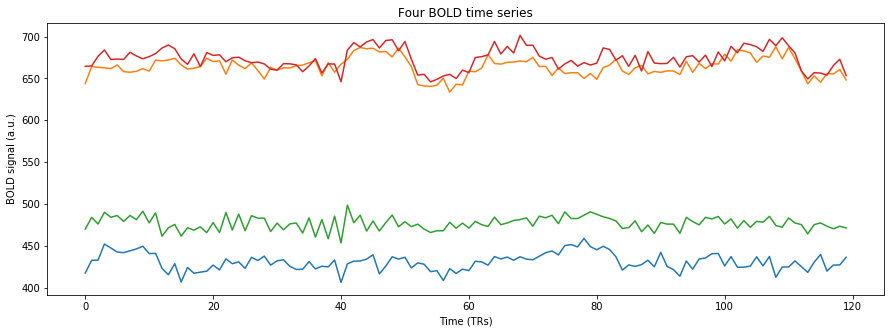

In [78]:
fig = plt.figure(figsize=(15, 5))
plt.plot(timeseries_multi[:, 0])
plt.plot(timeseries_multi[:, 1])
plt.plot(timeseries_multi[:, 2])
plt.plot(timeseries_multi[:, 3])

plt.xlabel('Time (TRs)')
plt.ylabel('BOLD signal (a.u.)')
plt.title('Four BOLD time series')

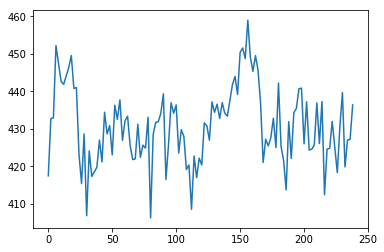

In [86]:
plt.plot(np.arange(0,120*2,2), timeseries_multi[:, 0])

In [85]:
np.arange(0,120*2,1).shape

(240,)

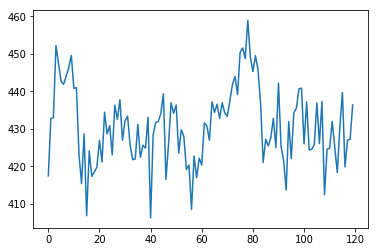

In [82]:
plt.plot(timeseries_multi[:, 0])

In [79]:
timeseries_multi.shape

(120, 4)

**Note:** The time is in units of TR, not seconds, because we only provided single time series arrays and no time arrays as we learned about last lecture. Remember, in this case `matplotlib` assumes the x-axis to simply represent the indices of the 1-D array.

As you may notice, it is unclear which line corresponds to which of our four voxels. A legend gives each line color a label. We can specify the label in the `plt.plot` function using `label=`. We can display a legend using the `plt.legend()` function. 

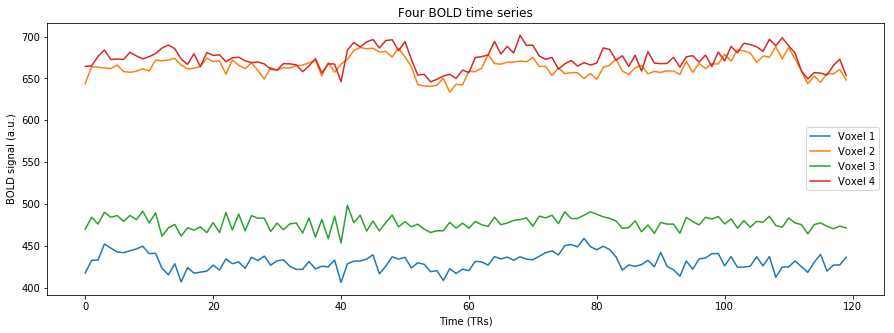

In [88]:
fig = plt.figure(figsize=(15, 5))
plt.plot(timeseries_multi[:, 0], label='Voxel 1')
plt.plot(timeseries_multi[:, 1], label='Voxel 2')
plt.plot(timeseries_multi[:, 2], label='Voxel 3')
plt.plot(timeseries_multi[:, 3], label='Voxel 4')

plt.xlabel('Time (TRs)')
plt.ylabel('BOLD signal (a.u.)')
plt.title('Four BOLD time series')

plt.legend()

Calling the same plot function for every single time series contained in a 2-D array can be tedious. There is a faster way. Simply call `plt.plot` on the entire 2-D array.

**Note:** The `plt.plot` function interprets the *columns* of the 2-D array as the lines it is supposed to plot, and it will plot one line for every column.

How many data points will each line have?

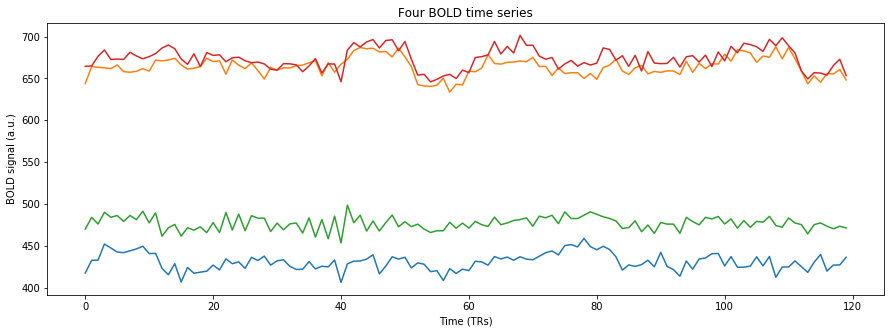

In [87]:
fig = plt.figure(figsize=(15, 5))

plt.plot(timeseries_multi)

plt.xlabel('Time (TRs)')
plt.ylabel('BOLD signal (a.u.)')
plt.title('Four BOLD time series')


Again, the legend is missing. Unfortunately `plt.plot` does not accept a list of labels for all the plots, but we can give them directly to the `plt.legend` function.

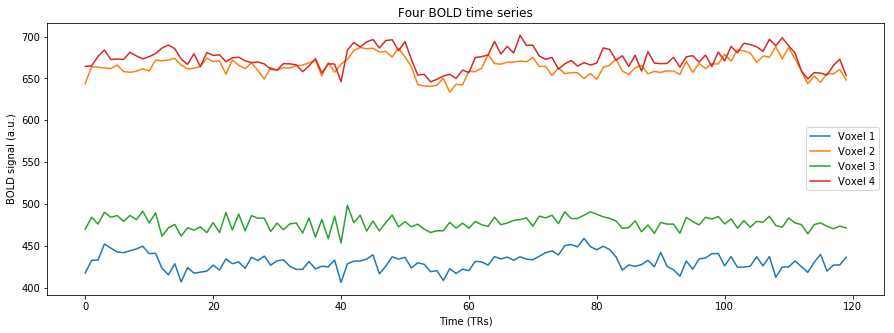

In [89]:
fig = plt.figure(figsize=(15, 5))

plt.plot(timeseries_multi)

plt.xlabel('Time (TRs)')
plt.ylabel('BOLD signal (a.u.)')
plt.title('Four BOLD time series')

labels = ('Voxel 1', 'Voxel 2', 'Voxel 3', 'Voxel 4')

plt.legend(labels)

<a id="Histograms_2D"></a>
### Histograms for Collections of Voxel Time Series

To plot multiple voxel timeseries as histograms in the same plot, we can use the same approach as we did with `plt.plot`, namely calling it multiple times in the same cell.

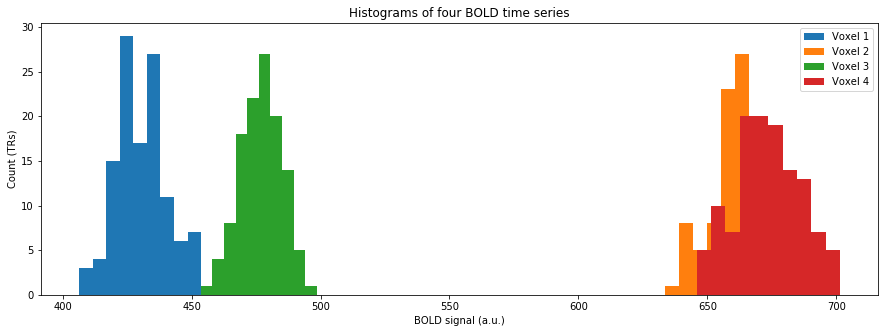

In [90]:
fig = plt.figure(figsize=(15, 5))

plt.hist(timeseries_multi[:, 0], label='Voxel 1')
plt.hist(timeseries_multi[:, 1], label='Voxel 2')
plt.hist(timeseries_multi[:, 2], label='Voxel 3')
plt.hist(timeseries_multi[:, 3], label='Voxel 4')

plt.title('Histograms of four BOLD time series')
plt.xlabel('BOLD signal (a.u.)')
plt.ylabel('Count (TRs)')
plt.legend()

Just like with `plt.plot`, `plt.hist` can take take a 2-D array. Unlike `plt.plot` however, `plt.hist` does not simply make multiple histograms as it would if called separately on multiple 1-D arrays. This means that using `plt.hist` on a 2-D array is not just a time-saving shortcut, because it makes a different plot. Let's explore its behavior here.

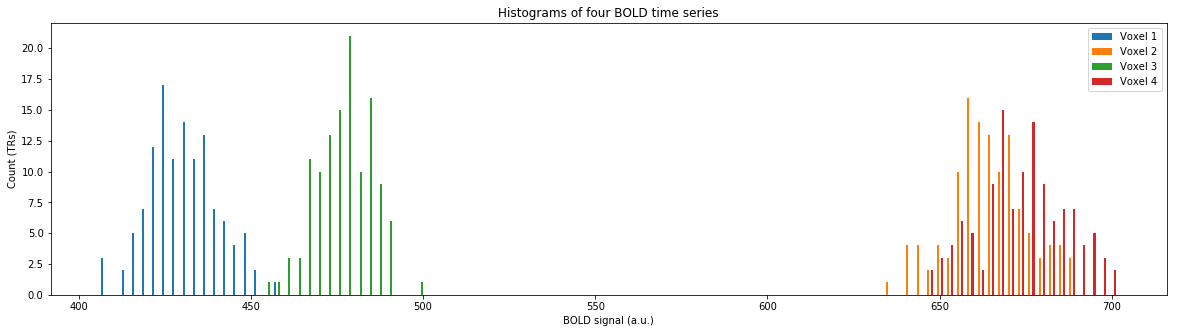

In [91]:
fig = plt.figure(figsize=(20,5))

h = plt.hist(timeseries_multi, bins=100)

plt.title('Histograms of four BOLD time series')
plt.xlabel('BOLD signal (a.u.)')
plt.ylabel('Count (TRs)')

labels = ('Voxel 1', 'Voxel 2', 'Voxel 3', 'Voxel 4')
plt.legend(labels)

So what is the difference between using `plt.hist` in these two ways?

#### Breakout Session

1\. Explain what using `plt.hist` with 2-D arrays does differently from using multiple calls to `plt.hist` on 1-D arrays. When is it useful to use `plt.hist` with 2-D arrays?

In [ ]:
### STUDENT ANSWER
# It does two things differently. First, the bars of the histogram are much less wide than the width of each bin
# which allows multiple bars to be displayed within each bin. This way distributions that overlap can be seen.
# Second, it uses the same bins for all the 1-D arrays plotted as histograms, whereas multiple calls to `plt.hist`
# result in different bins.

2\. Create two random 1-D arrays of length `100`, then stack them in the second dimension (`axis=1`) and call this `random_2D`.

In [93]:
### STUDENT ANSWER
random_1D1 = np.random.rand(100)
random_1D2 = np.random.rand(100)
random_2D = np.stack((random_1D1,random_1D2), axis=1)
random_2D.shape

(100, 2)

3\. Create line plots of `random_2D` as if they were both voxel time series. Be sure to label the title, axes and make a legend.

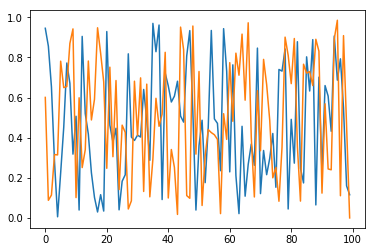

In [94]:
### STUDENT ANSWER
plt.plot(random_2D)

4\. Finally, plot histograms of `random_2D`. Choose whether to use a single call to `plt.hist` giving it the entire 2-D array, or multiple calls with 1-D arrays. Justify why you choose the technique that you did.

(array([ 10.,  10.,   8.,  12.,  12.,   4.,  14.,  10.,   8.,  12.]),
 array([ 0.00104853,  0.09945132,  0.1978541 ,  0.29625689,  0.39465967,
         0.49306246,  0.59146524,  0.68986803,  0.78827081,  0.88667359,
         0.98507638]),
 <a list of 10 Patch objects>)

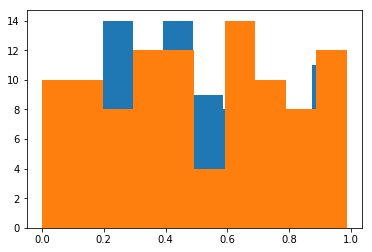

In [95]:
### STUDENT ANSWER
plt.hist(random_2D[:,0])
plt.hist(random_2D[:,1])

([array([ 10.,  10.,  14.,   7.,  16.,   7.,  10.,   7.,   9.,  10.]),
  array([ 10.,  10.,   8.,  12.,  12.,   4.,  14.,  10.,   8.,  12.])],
 array([ 0.00104853,  0.09945132,  0.1978541 ,  0.29625689,  0.39465967,
         0.49306246,  0.59146524,  0.68986803,  0.78827081,  0.88667359,
         0.98507638]),
 <a list of 2 Lists of Patches objects>)

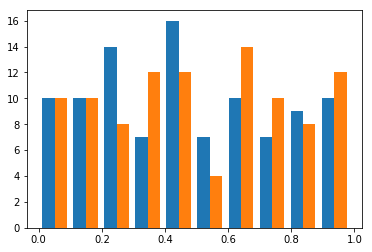

In [96]:
### STUDENT ANSWER
plt.hist(random_2D)

<a id="Slice_Image"></a>
## Visualizing 2-D Slice Data as an image

If we have data with two ordered axes, such as fMRI slices, then displaying the data as an image allows for a concise, information-dense visualization. You likely see images displayed on computer screens every day. These images consist of the 3 red, green and blue color values for each pixel, or point in the picture. The size of the picture is determined by the number of pixels. The location of each pixel in the image on your screen corresponds to the location of the numbers that represent that pixel on the two coordinates of the ordered axes of the array. Displaying data as an image permits us to assess the global structure of the data in one glance.

<a id="XYZ"></a>
We know fMRI data is stored in the niftis in (X, Y, Z, Time) order, and that we always want to transpose the data so it is (Time, Z, Y, X). We haven't yet learned what dimensions in space X, Y, and Z represent. The image below shows us that, when looking at the brain in the "face":
- **X** goes from left to right
- **Y** goes from front to back
- **Z** goes from top to botom

We will use `plt.imshow` to draw images in this notebook. Before we do, let's get a quick reminder about the 3 types of slices of a 3-D fMRI volume we can have:

<img src="images/slices.png" align="left"style="height: 300px;">
<img src="images/Brain_X_Y_Z.gif" style="height: 300px;">

Let's use `plt.imshow` to look at an example slice that we loaded at the beginning of lecture. 

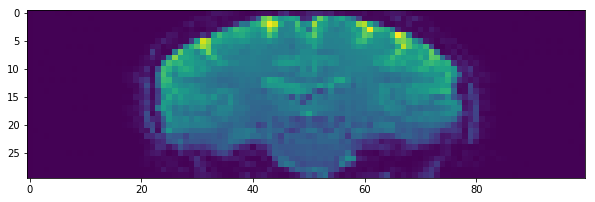

In [97]:
fig = plt.figure(figsize=(10, 10))
im = plt.imshow(slice_coronal) 

<a id="Aspect_Ratio"></a>
This looks somewhat squashed. This is because the **aspect ratio** is not correct. An **aspect ratio** is a ratio of the height to the width of a pixel. For example, an aspect ratio of `1/2` means that every pixel should be displayed half as tall as it is wide. 

`plt.imshow` assumes that the pixels it displays are squares. However, we happen to know that the voxels used for this particular brain image are not perfect cubes. In fact we can obtain their shape from the header of the Nifti file:

In [98]:
voxel_shape = img.header.get_zooms()
print(voxel_shape)

(2.24, 2.24, 4.1300001, 1.0)


The first three values of this tuple give us the voxel dimensions in x, y, and z. In order to obtain the correct aspect ratio to view this image, we need to divide the height of each pixel by its width. Since coronal slices vary in the x, and the z-directions, while keeping the y-value fixed, the voxel dimensions that we can see in this image are the first and the third. 

Their ratio is `4.13 / 2.24`. We can set `aspect` equal to this number in `plt.imshow` to give us the correct aspect ratio:  

In [99]:
aspect_ratio_coronal = voxel_shape[2] / voxel_shape[0]
print(aspect_ratio_coronal)

1.84375


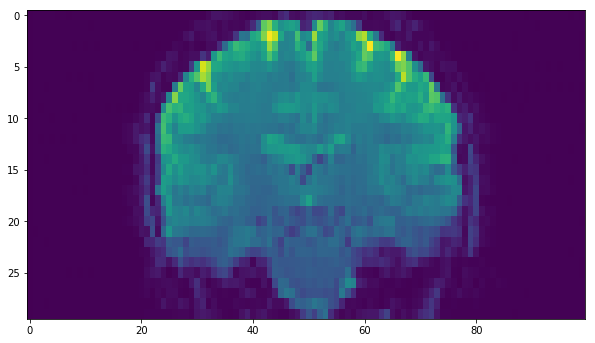

In [100]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(slice_coronal, aspect=aspect_ratio_coronal) 

In [101]:
slice_coronal.shape

(30, 100)

Notice that there are numbers on the axes. These numbers represent the number of voxels in each direction. While they can be useful, oftentimes these plots look better without the numbers, and they don't add very much information, so they are removed. 

We can use `plt.axis('off')` to turn these tick marks off.

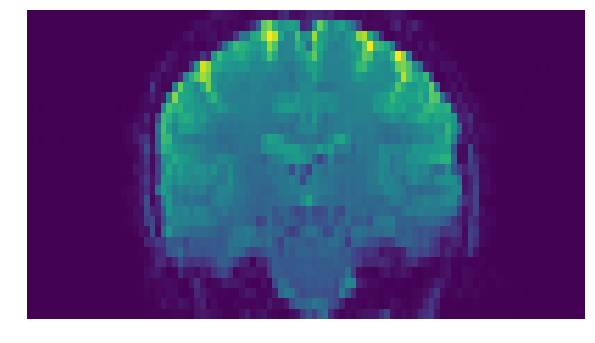

In [102]:
fig = plt.figure(figsize=(10, 10))
im = plt.imshow(slice_coronal, aspect=aspect_ratio_coronal) 
plt.axis('off');

Let's have a look at the other two types to get a better feel for what they usually look like.

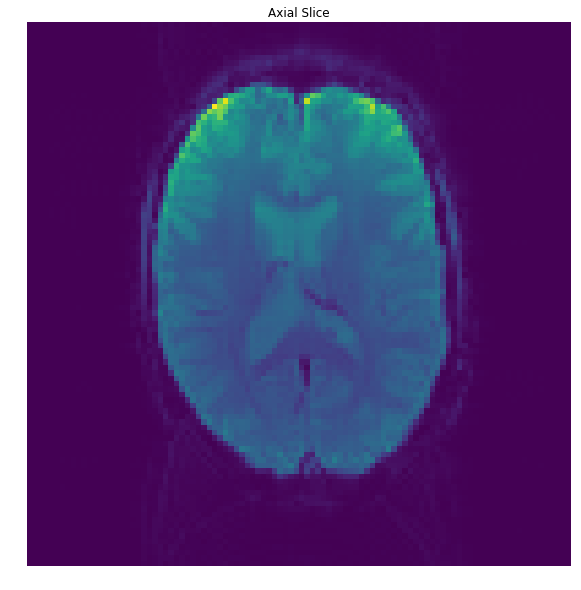

In [103]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(slice_axial) 
plt.title('Axial Slice')
plt.axis('off');

In [104]:
slice_axial.shape

(100, 100)

Notice that we did not need to specify an aspect ratio for the axial slice, because we are plotting x and y values at a fixed z-coordinate. Since voxels in the axial plane result in pixels of size `2.24mm x 2.24mm`, the aspect ratio is 1, which is the default value used by `plt.imshow`.

For the sagittal slice we vary the y- and z-coordinates at a fixed x-value. Let's compute the aspect ratio necessary for plotting these correctly:

In [105]:
aspect_ratio_sagittal = voxel_shape[2] / voxel_shape[1]
print(aspect_ratio_sagittal)

1.84375


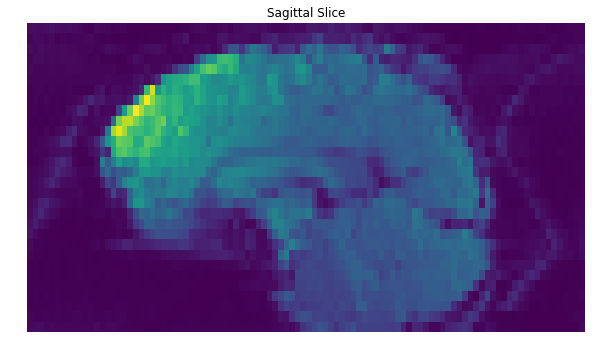

In [106]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(slice_sagittal, aspect=aspect_ratio_sagittal) 
plt.title('Sagittal Slice')
plt.axis('off');

Notice that `plt.imshow` has assigned blue to green to yellow-ish color hues to the values of the voxels. `plt.imshow` plots images by assigning specific colors to each possible value in the 2-D array to plot.

We can take a look at how these values are assigned by plotting a `plt.colorbar` into our figure. Let's do that for our previous plot:

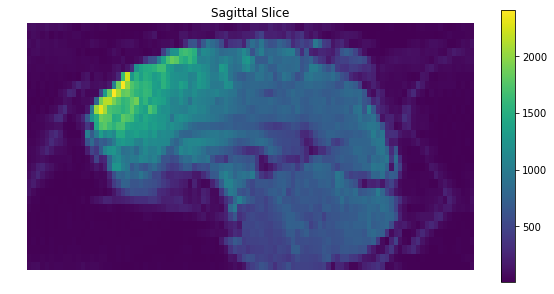

In [107]:
fig = plt.figure(figsize=(10, 5))
im = plt.imshow(slice_sagittal, aspect=aspect_ratio_sagittal) 
plt.colorbar()
plt.title('Sagittal Slice')
plt.axis('off');

<a id="Colormap"></a>
This mapping between values and colors is called a **colormap**. Matplotlib provides many different colormaps and sometimes it can be useful to select a different one from the default. Here we will display the brain image in a gray scale colormap.


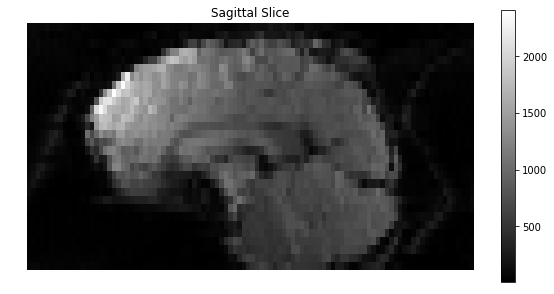

In [108]:
fig = plt.figure(figsize=(10,5))
im = plt.imshow(slice_sagittal, aspect=aspect_ratio_sagittal, cmap='gray') 
plt.colorbar()
plt.title('Sagittal Slice')
plt.axis('off');

### Breakout session:
1\. Plot `slice_surprise`. What type of slice is it?

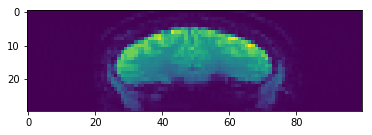

In [109]:
### STUDENT ANSWER
im2 = plt.imshow(slice_surprise)

2\. Plot `slice_surprise` again using the correct aspect ratio. Also remove the axis labels, plot a title, colorbar and make the image be in gray scale.

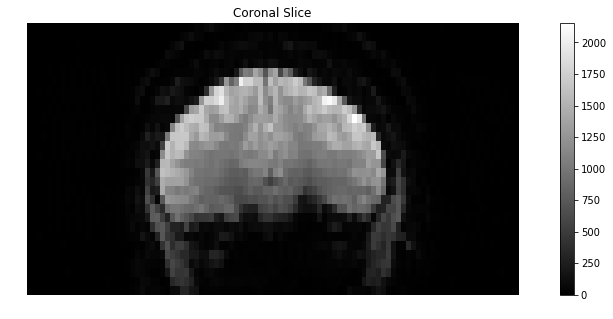

In [111]:
## STUDENT ANSWER
fig3 = plt.figure(figsize=(15,5))
im3 = plt.imshow(slice_surprise, aspect=aspect_ratio_coronal, cmap='gray')
plt.title('Coronal Slice')
plt.axis('off')
plt.colorbar()

<a id="Slicing_fMRI_Data"></a>
## Slicing 2-D fMRI data
We've postponed slicing in real fMRI data because visualizing what happens when we use slicing to subset fMRI data allows for quick instight into what is happening. Slicing is useful in both types of 2-D fMRI arrays, slices and collections of voxel timeseries. Here's a few of the most common ways slicing is used in real fMRI data:

1. **Crop 1 or 2 axes of slices in space**
2. **Crop the single time axis of a collection of voxel time series to truncate it**
3. **Downsample both axes of a slice in space to reduce spatial resolution**
4. **Downsample the time axes of a collection of voxel time series to reduce temporal resolution**

Let's look at some examples, starting with cropping fMRI data slices. Let's remove the last 20 rows  from the axial slice we've been plotting. 

In [112]:
slice_axial_crop20rows = slice_axial[:-20, :]
slice_axial_crop20rows.shape

(80, 100)

Now let's plot the original image, followed by the sliced image. 

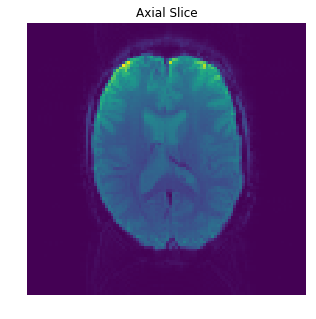

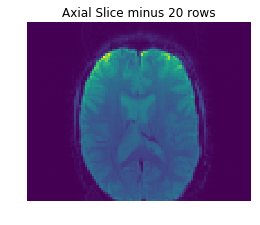

In [113]:
fig1 = plt.figure(figsize=(5, 5))
plt.imshow(slice_axial, aspect='auto') 
plt.title('Axial Slice')
plt.axis('off');

fig2 = plt.figure(figsize=(4, 4))
plt.imshow(slice_axial_crop20rows) 
plt.title('Axial Slice minus 20 rows')
plt.axis('off');

We see that by slicing the axial slice to remove the last 20 rows we've simply cropped the bottom of the image off.

What if we want to crop both the bottom and left side of the image?

In [114]:
slice_axial_crop20rowscolumns = slice_axial[:-20, :-20]
slice_axial_crop20rowscolumns.shape

(80, 80)

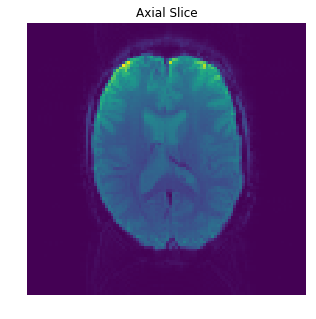

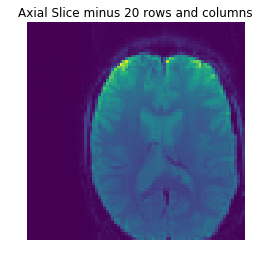

In [115]:
fig1 = plt.figure(figsize=(5, 5))
plt.imshow(slice_axial, aspect='auto') 
plt.title('Axial Slice')
plt.axis('off');

fig2 = plt.figure(figsize=(4, 4))
plt.imshow(slice_axial_crop20rowscolumns) 
plt.title('Axial Slice minus 20 rows and columns')
plt.axis('off');

When dealing with collections of voxel time series it generally only makes sense to slice the time dimension, effectively truncating the time series at the front or back. Let's see how that works by dropping the last 20 TRs from all the voxel time series in `timeseries_multi`.

In [116]:
timeseries_multi.shape

(120, 4)

In [117]:
timeseries_multi_truncated = timeseries_multi[:-20, :]
timeseries_multi_truncated.shape

(100, 4)

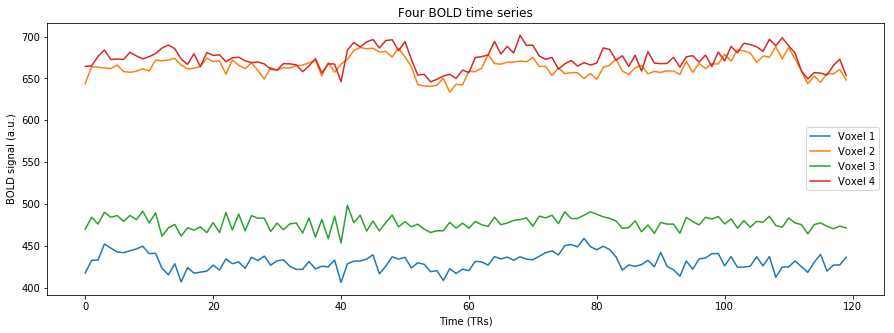

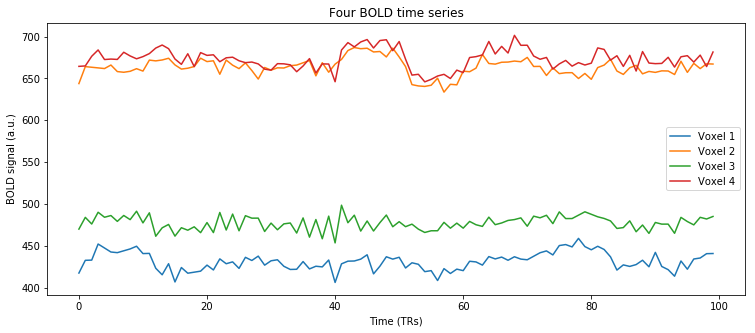

In [118]:
fig1 = plt.figure(figsize=(15, 5))
plt.plot(timeseries_multi)
plt.xlabel('Time (TRs)')
plt.ylabel('BOLD signal (a.u.)')
plt.title('Four BOLD time series')
labels = ('Voxel 1', 'Voxel 2', 'Voxel 3', 'Voxel 4')
plt.legend(labels)

fig1 = plt.figure(figsize=(12.5, 5))
plt.plot(timeseries_multi_truncated)

plt.xlabel('Time (TRs)')
plt.ylabel('BOLD signal (a.u.)')
plt.title('Four BOLD time series')
plt.legend(labels)

Downsampling a fMRI data slice results in an image with reduced spatial resolution. Let's see what the axial slice image downsampled by a factor of 2 in both axes looks like: 

In [119]:
slice_axial_downsampled2 = slice_axial[::2, ::2]
slice_axial_downsampled2.shape

(50, 50)

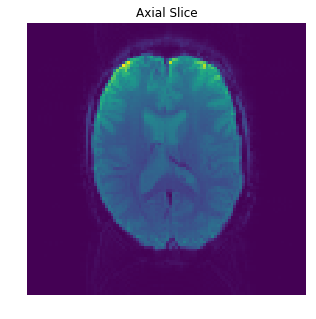

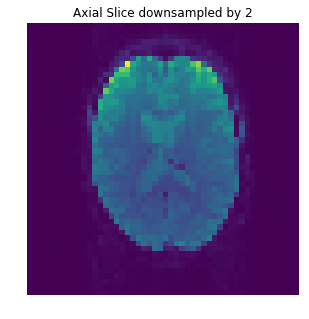

In [120]:
fig1 = plt.figure(figsize=(5,5))
plt.imshow(slice_axial, aspect='auto') 
plt.title('Axial Slice')
plt.axis('off');

fig2 = plt.figure(figsize=(5,5))
plt.imshow(slice_axial_downsampled2) 
plt.title('Axial Slice downsampled by 2')
plt.axis('off');

We can see that the image can still be plotted at the same size, but that the spatial resolution looks less, as if the image has been pixelated.

Collections of voxel time series can be downsampled as well, however it only makes sense to do so in the time dimension. Let's downsample the collection of voxel time series by a factor of 3:

In [121]:
timeseries_multi_downsampled3 = timeseries_multi[::3, :]
timeseries_multi_downsampled3.shape

(40, 4)

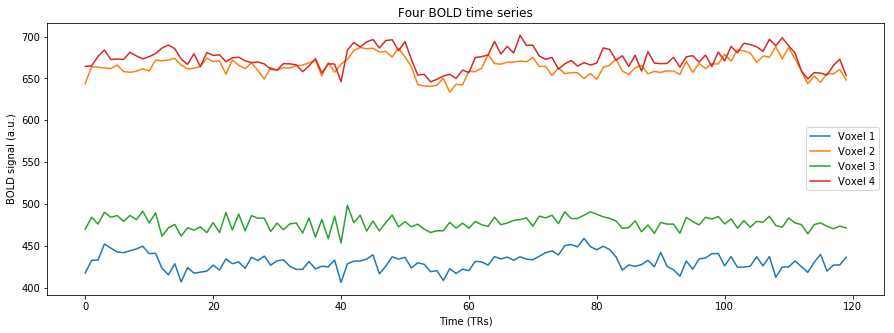

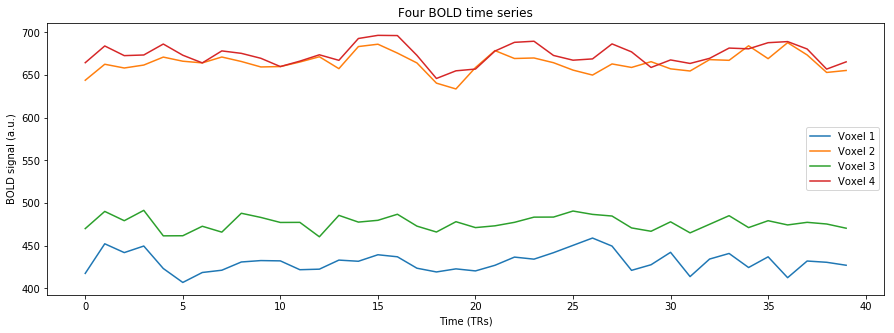

In [122]:
fig1 = plt.figure(figsize=(15, 5))
plt.plot(timeseries_multi)
plt.xlabel('Time (TRs)')
plt.ylabel('BOLD signal (a.u.)')
plt.title('Four BOLD time series')
labels = ('Voxel 1', 'Voxel 2', 'Voxel 3', 'Voxel 4')
plt.legend(labels)

fig1 = plt.figure(figsize=(15, 5))
plt.plot(timeseries_multi_downsampled3)

plt.xlabel('Time (TRs)')
plt.ylabel('BOLD signal (a.u.)')
plt.title('Four BOLD time series')
plt.legend(labels)

#### Breakout session

- Plot `slice_axial` as an image.
- Use slicing to crop `slice_axial` as closely as possible around the brain. Plot this cropped image. 
- Repeat steps 1 and 2 until you've cropped the `slice_axial` to only contain brain, no empty space.

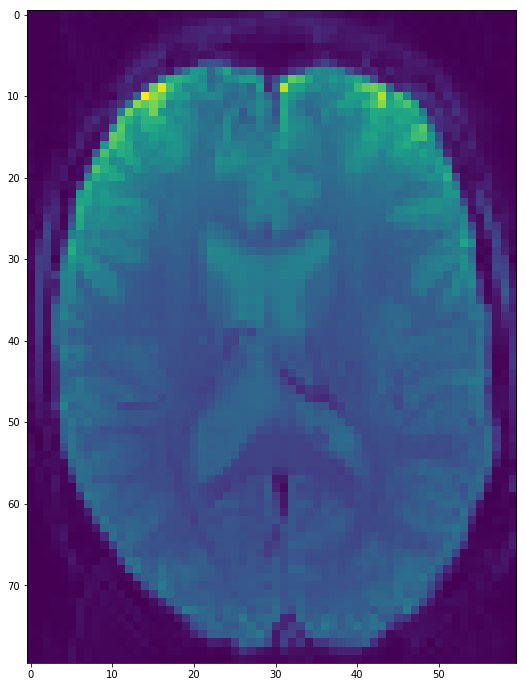

In [126]:
### STUDENT ANSWER
fig4 = plt.figure(figsize=(12,12))
plt.imshow(slice_axial[5:-15,20:-20])

<a id="Design_Matrix"></a>
# Design Matrices

In cognitive neuroscience, and data science broadly, the 2-D array containing information about what stimuli or task was done during each TR is known as a **design matrix**. A **matrix** is a term for a 2-D array, and so the **design matrix** is the matrix containing the quantification of the experimental design. Each row is a TR in the experiment, and each column represents a different type of stimulus or task used in the experiment. 

We'll be using **design matrices** extensively in the second half of the class when doing statistical analyses of the fMRI data. In the meantime, we'll learn about a couple of useful ways to visualize the **design matrix**.

Let's first load a design matrix from a `npy` file and inspect its shape. The `npy` file that we downloaded in class last week just happens to contain a design matrix, so we'll use that. If the file isn't still on your datahub account for whatever reason, just uncomment and run the below cell first.

In [ ]:
#import urllib.request
#url_npy = 'https://berkeley.box.com/shared/static/6y3h0bk2fvfdlelvcq1y0mnqzdwl7rrm.npy'
#design_mat_filename = '/home/jovyan/experiment_design_run1.npy'
#_ = urllib.request.urlretrieve(url_npy, design_mat_filename)

In [ ]:
design_mat_filename = '/home/jovyan/experiment_design_run1.npy'
design_mat = np.load(design_mat_filename)
design_mat.shape

In [ ]:
design_mat_labels = ['Stimulus 1', 'Stimulus 2', 'Stimulus 3', 'Stimulus 4', 'Stimulus 5']
design_mat_labels

## Plotting Design Matrices as Line Plots

The first way to plot design matrices should be familiar, as we've just used it to display multiple voxel time series. Since the design matrix represents time along its rows, just as the collection of voxel time series, we can simply plot the design matrix as a collection of time series, one for each type of stimulus or task.

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(design_mat[:, 0], label = design_mat_labels[0])
plt.plot(design_mat[:, 1], label = design_mat_labels[1])
plt.plot(design_mat[:, 2], label = design_mat_labels[2])
plt.plot(design_mat[:, 3], label = design_mat_labels[3])
plt.plot(design_mat[:, 4], label = design_mat_labels[4])
plt.title('Design Matrix')
plt.xlabel('Time (TRs)')

Hmm, it seems all of the columns of the design matrix go from `0` to `1`, and so they overlap in a way that makes it hard to see what is going on. To fix this, we can use a little trick and add a different value to each column. Let's see what that does:

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(design_mat[:, 0] + 8, label = design_mat_labels[0])
plt.plot(design_mat[:, 1] + 6, label = design_mat_labels[1])
plt.plot(design_mat[:, 2] + 4, label = design_mat_labels[2])
plt.plot(design_mat[:, 3] + 2, label = design_mat_labels[3])
plt.plot(design_mat[:, 4] + 0, label = design_mat_labels[4])
plt.title('Design Matrix')
plt.xlabel('Time (TRs)')

That's much better. This figure is missing a legend so we can't tell which stimulus each line represents. We'll create a legend again using `plt.legend`, but since the lines take up almost the entire figure we'll need to indicate that legend should be outside of the figure. To do that we'll use `bbox_to_anchor=(1,1)`, which says to anchor the `bbox` or bounding box of the legend to the point `(1,1)`, which is the top right corner.

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(design_mat[:, 0] + 8, label = design_mat_labels[0])
plt.plot(design_mat[:, 1] + 6, label = design_mat_labels[1])
plt.plot(design_mat[:, 2] + 4, label = design_mat_labels[2])
plt.plot(design_mat[:, 3] + 2, label = design_mat_labels[3])
plt.plot(design_mat[:, 4] + 0, label = design_mat_labels[4])
plt.title('Design Matrix')
plt.xlabel('Time (TRs)')
_ = plt.legend(bbox_to_anchor=(1, 1))

## Plotting Design Matrices as Images
The second way to visualize a design matrix is to make an image which uses colors to represent the magnitude of the values in the design matrix. This is a common visualization used by FSL (the neuroimaging tool we will discuss during week 6) and others. In the below image, "hotter" colors (i.e. more white, yellow and red) indicate values with a larger value. You can see the high areas where the stimulus is convolved with the HRF in bright red, then yellow, then white, and the "undershoot" where the HRF goes below zero in black.

In [ ]:
fig = plt.figure(figsize=(10, 10))
_ = plt.imshow(design_mat)

Well that doesn't look right. We're using `plt.imshow` to show this design matrix as an image, but the aspect ratio is way wrong, since the design matrix has so many more rows than columns. To make it look better, we can use `aspect='auto'` in `plt.imshow`, this time telling it to automatically make the image the size of the figure. 

In [ ]:
fig = plt.figure(figsize=(10, 10))
_ = plt.imshow(design_mat, aspect='auto')

That's more like it. Now let's add the axis labels and a title to complete the job. The x-axis doesn't really need a single axis label, but id oes need labels for each of the columns that indicate which stimulus is which. To do this, we'll use `plt.xticks`, which we learned about last lecture.

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(design_mat, aspect='auto')
plt.title('Design Matrix')
plt.ylabel('Time (TRs)')
_ = plt.xticks(np.arange(5), design_mat_labels)